In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
index = 4882
image = cv2.imread(f"/Users/muxin/PyCharm/FreiHAND/original/naked_hands/{index:08d}.jpg")

# Specify the kernel size.
# The greater the size, the more the motion.
kernel_size = 20
  
# Create the vertical kernel.
kernel_v = np.zeros((kernel_size, kernel_size))
  
# Create a copy of the same for creating the horizontal kernel.
kernel_h = np.copy(kernel_v)

# Create a copy of the same for creating the diagonally kernel.
kernel_d = np.copy(kernel_v)

# Fill the middle row with ones.
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
for i in range(len(kernel_d)):
    kernel_d[i][i] = 1
    
# # Normalize.
kernel_v /= kernel_size
kernel_h /= kernel_size
kernel_d /= kernel_size

# Apply the vertical kernel.
vertical_mb = cv2.filter2D(image, -1, kernel_v)
  
# Apply the horizontal kernel.
horizonal_mb = cv2.filter2D(image, -1, kernel_h)

# Apply the diagonal kernel.
diagonal_mb = cv2.filter2D(image, -1, kernel_d)

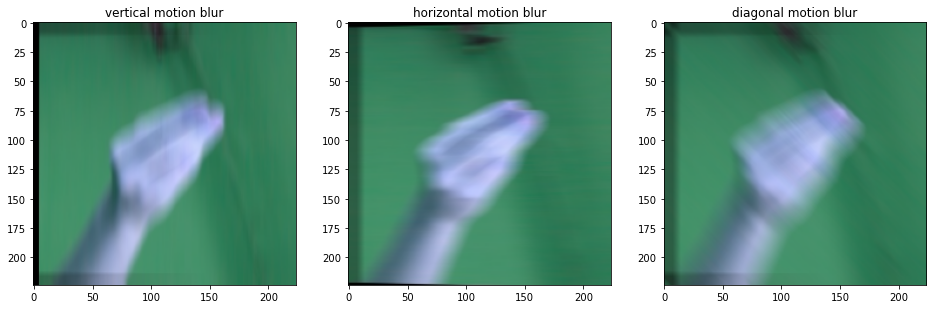

In [5]:
fig = plt.figure(figsize=(16, 12))
columns, rows = 3, 1
image = [vertical_mb, horizonal_mb, diagonal_mb]  
titles = ['vertical motion blur', 'horizontal motion blur', 'diagonal motion blur']

for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i)
    plt.title(titles[i-1])
    plt.imshow(image[i-1])
plt.show()